# Scraping the web
Beatiful soup, requests: Data Science from Scratch

### HTML and the Parsing Thereof
Find all the books published (up to now) with the title 'data'- 
on the O'Reilly website, and make a simple plot

In [123]:
from bs4 import BeautifulSoup
import requests

website = 'http://www.cosmo.bnl.gov/www/jvazquez/'


html = requests.get(website).text
soup = BeautifulSoup(html, 'lxml')

In [124]:
soup.find('link')


<link href="https://www.bnl.gov/pga/images/Logo_Small.jpg" rel="icon" type="image/jpg"/>

In [125]:
soup.p.text

u'\n\n  \xa0 '

In [126]:
soup.find_all('a')
soup.a['href']
paras_with_web = [a for a in soup('a') if a.get('href') and a.get('class')]
print paras_with_web

[<a class="navbar-brand" href="http://www.cosmo.bnl.gov/www/jvazquez/">JA Vazquez</a>, <a class="label label-primary" href="http://www.cosmo.bnl.gov/www/jvazquez" title="Articles"><i class="fa fa-folder-open-o"></i> </a>, <a class="label label-info" href="http://www.cosmo.bnl.gov/www/jvazquez" title="Home">main</a>, <a class="label label-info" href="http://www.easycounter.com/" target="_blank" title="Visitors">\n<img alt="HTML Hit Counter" border="0" src="http://www.easycounter.com/counter.php?vetovazquez"/></a>, <a class="next" href="http://www.cosmo.bnl.gov/www/jvazquez/files/Research.html" title="Next">Next  <br/><i class="fa fa-arrow-circle-right fa-lg"></i></a>, <a class="link-white" href="http://www.cosmo.bnl.gov/www/jvazquez/files/Contacts.html" title="Contact"> <i class="fa fa-envelope"></i>\n</a>, <a class="link-white" href="https://www.sdss3.org/surveys/boss.php" target="_blank" title="BOSS">BOSS</a>, <a class="link-white" href="https://www.sdss3.org/future/eboss.php" target=

In [127]:
next_parags = soup('a', {'class': 'next'})
print next_parags

[<a class="next" href="http://www.cosmo.bnl.gov/www/jvazquez/files/Research.html" title="Next">Next  <br/><i class="fa fa-arrow-circle-right fa-lg"></i></a>]


In [128]:
next_parags2 = soup('a', 'next')
print next_parags2

[<a class="next" href="http://www.cosmo.bnl.gov/www/jvazquez/files/Research.html" title="Next">Next  <br/><i class="fa fa-arrow-circle-right fa-lg"></i></a>]


# O'Reilly Books about data

In [129]:
url = 'http://shop.oreilly.com/category/browse-subjects/data.do?sortby=publicationDate&page=1'
soup = BeautifulSoup(requests.get(url).text, 'lxml')

In [130]:
tds = soup('td', 'thumbtext')
print len(tds)

30


#### Videos

In [140]:
#search for 'Videos' --> If span class ='pricelabel' has 'Video' in it
print tds[-1]


<td class="thumbtext">
<!-- SC-2012-83268 commented <script type="text/javascript" src="/text/pwr/engine/js/full.js"></script> -->
<script type="text/javascript">
		var pr_locale = 'en_US';
		var pr_zip_location='/text';
		var pr_style_sheet='/includes/reviews_social.css ';
		var pr_page_id = '9781785286315.IP'; 
	</script>
<div style="float:left;">
<div class="thumbcontainer">
<div class="thumbdiv"><a href="/product/9781785286315.do"><img alt="Regression Analysis with Python" border="0" src="http://akamaicovers.oreilly.com/images/9781785286315/bkt.gif" width="85"/></a></div>
<a href="https://library.oreilly.com/book/9781785286315/_/toc" id="search-inside" onclick="var s=s_gi(s_account); s.products=';shop-reader-searchin-9781785286315'; s.eVar23='shop-reader-searchin-9781785286315'; s.events='event5'; s.linkTrackVars='eVar23,products,events'; s.linkTrackEvents='event5'; s.tl(this,'o','Ad Click');">Search Inside and Read</a>
</div>
</div>
<div class="widthchange" style="float:left; widt

In [132]:
print tds[4]('span', 'pricelabel')

[<span class="pricelabel">\r\n\t\t\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\tVideo\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t:\r\n\t\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\t<span class="price">\xa0$74.99</span>\n</span>]


In [133]:
print tds[4]('span', 'pricelabel')[0]

<span class="pricelabel">
					
						
						
							
							Video
						
					:
					
					
					
					
					
					
					
					
					<span class="price"> $74.99</span>
</span>


In [134]:
print  tds[4]('span', 'pricelabel')[0].text.strip()

Video
						
					:
					
					
					
					
					
					
					
					
					 $74.99


In [135]:
def is_video(td):
    pricelabels = td('span', 'pricelabel')
    return (pricelabels[0].text.strip().startswith('Video'))

print len([tdz for tdz in tds if not is_video(tdz)])

23


#### Title

In [136]:
#seems that the title is within <div class="thumbheader"> <a ....

title = tds[4].find('div', 'thumbheader').a.text
print title

Julia for Data Science


In [137]:
#Same for title

author = tds[3].find('div', 'AuthorName').text
print author

By Raghav Bali, Dipanjan Sarkar


In [141]:
import re

author_name = td.find('div', 'AuthorName').text
authors = [x.strip() for x in re.sub('^By ', '', author_name).split(',')]
print authors

[u'Luca Massaron', u'Alberto Boschetti']


#### date

In [146]:
date = td.find('span', 'directorydate').text.strip()
print date

February 2016


### All together

In [147]:
def book_info(td):
    title = td.find('div', 'thumbheader').a.text
    by_author = td.find('div', 'AuthorName').text
    authors = [x.strip() for x in re.sub('^By ', '', by_author).split(',')]
    date = td.find('span', 'directorydate').text.strip()
    
    return {
        'title': title,
        'authors': authors,
        'date': date
    }

In [170]:
from bs4 import BeautifulSoup
import requests
from time import sleep

base_url = 'http://shop.oreilly.com/category/browse-subjects/data.do?sortby=publicationDate&page='

books = []
NUM_PAGES = 44

for page_num in range(1, NUM_PAGES+1):
    print 'souping page', page_num, ',', len(books), 'found so far'
    url = base_url + str(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'lxml')
    
    for td in soup('td', 'thumbtext'):
        if not is_video(td):
            books.append(book_info(td))
        
    sleep(30)

souping page 1 , 0 found so far
souping page 2 , 23 found so far
souping page 3 , 47 found so far
souping page 4 , 72 found so far
souping page 5 , 96 found so far
souping page 6 , 119 found so far
souping page 7 , 145 found so far
souping page 8 , 168 found so far
souping page 9 , 190 found so far
souping page 10 , 215 found so far
souping page 11 , 243 found so far
souping page 12 , 268 found so far
souping page 13 , 292 found so far
souping page 14 , 316 found so far
souping page 15 , 340 found so far
souping page 16 , 366 found so far
souping page 17 , 388 found so far
souping page 18 , 412 found so far
souping page 19 , 438 found so far
souping page 20 , 464 found so far
souping page 21 , 490 found so far
souping page 22 , 519 found so far
souping page 23 , 546 found so far
souping page 24 , 576 found so far
souping page 25 , 604 found so far
souping page 26 , 629 found so far
souping page 27 , 658 found so far
souping page 28 , 687 found so far
souping page 29 , 714 found so far


### Plotting

Counter({2015: 247, 2013: 200, 2014: 166, 2012: 104, 2011: 79, 2010: 70, 2009: 50, 2006: 35, 2007: 22, 2008: 22, 2002: 20, 2004: 20, 2005: 19, 2001: 17, 2003: 16, 2000: 5, 1999: 2, 1985: 1, 1991: 1, 1992: 1, 1996: 1, 1997: 1, 1998: 1})


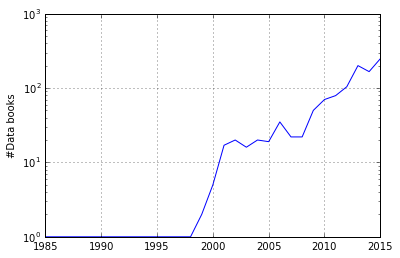

In [176]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline 

def get_year(book):
    return int(book['date'].split()[1])

year_counts = Counter(get_year(book) for book in books
                     if get_year(book) <= 2015)
print year_counts
years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.plot(years, book_counts)
plt.yscale('log')
plt.grid()
plt.ylabel('#Data books')
plt.show()

# Yellow Pages, Coffee places
Coding For Entrepreneurs [link](https://www.youtube.com/watch?v=3xQTJi2tqgk&index=1&list=PLyFizHxKlcur5Xrzz7IywssC9lFZRb7VF)

In [2]:
import requests
from bs4 import BeautifulSoup

In [80]:
url = 'http://www.yellowpages.com/search?search_terms=coffee&geo_location_terms=New+York+City%2C+NY'

url_2 = url + "&page=" + str(2)

r = requests.get(url_2)

soup = BeautifulSoup(r.content)

links = soup.find_all("a")

#for link in links:
#    print link.text, link.get("href")

g_data = soup.find_all("div", {"class": "info"})

for item in g_data:
    print item.contents[0].find_all("a", {"class": "business-name"})[0].text


Joe the Art of Coffee
Cafe Sabarsky
Cafe Evergreen
Cafe De Bruxelles
Starbucks Coffee
McNulty's Tea & Coffee Co
12 Chairs
Caffe Dante
Peter Mcmanus Cafe
Via della Pace
Cafe Pick Me Up
Epistrophy Cafe
Vbar
Circle West Diner & Cafe
Atlas Cafe
Aroma Espresso Bar
Manhattan Espresso Cafe
Sugar Cafe
Push Cafe
Anyway Cafe
Caffe Linda
Guy & Gallard
Despresso
Choux Factory
Lan Cafe
Ruben's Empanadas
Emporio
Caffe Cielo
Cafe Angelique
Think Coffee


In [84]:
for item in g_data:
    try:
        print item.contents[1].find_all("div", {"itemprop": "telephone"})[0].text
    except:
        pass

(212) 924-6750
(212) 288-0665
(212) 744-3266
(212) 206-1830
(212) 869-0191
(212) 242-5351
(212) 254-8640
(212) 982-5275
(212) 929-9691
(212) 253-5803
(212) 673-7231
(212) 966-0904
(212) 253-5740
(212) 397-3131
(212) 539-0966
(212) 533-1094
(212) 832-3010
(212) 260-1122
(212) 477-8100
(212) 533-3412
(646) 497-1818
(212) 683-3044
(212) 982-7030
(212) 223-0730
(212) 228-8325
(212) 334-3351
(212) 966-1234
(212) 246-9555
(212) 475-3500
(212) 228-6226


In [85]:
for item in g_data:
    try:
        print item.contents[1].find_all("span", {"class": "street-address"})[0].text 
    except:
        pass
    try:
        print item.contents[1].find_all("span", {"class": "locality"})[0].text.replace(',','') 
    except:
        pass
    try:
        print item.contents[1].find_all("span", {"itemprop": "addressRegion"})[0].text 
    except:
        pass
    try:
        print item.contents[1].find_all("span", {"itemprop": "postalCode"})[0].text 
    except:
        pass
    print '--'


141 Waverly Pl
New York
NY
10014
--
1048 5th Ave
New York
NY
10028
--
1288 1st Ave Frnt
New York
NY
10021
--
118 Greenwich Ave
New York
NY
10011
--
1460 Broadway
New York
NY
10036
--
109 Christopher St
New York
NY
10014
--
56 Macdougal St
New York
NY
10012
--
7981 Macdougal St
New York
NY
10012
--
152 7th Ave
New York
NY
10011
--
48 E 7th St
New York
NY
10003
--
145 Avenue A
New York
NY
10009
--
200 Mott St
New York
NY
10012
--
225 Sullivan St
New York
NY
10012
--
313 W 57th St
New York
NY
10019
--
73 2nd Ave
New York
NY
10003
--
145 Greene St
New York
NY
10012
--
146 E 49th St Frnt 1
New York
NY
10017
--
200 Allen St
New York
NY
10002
--
294 3rd Ave
New York
NY
10010
--
32 E 2nd St
New York
NY
10003
--
145 E 49th St
New York
NY
10017
--
459 Park Ave S
New York
NY
10016
--
100 Stanton St Frnt 1
New York
NY
10002
--
865 United Nations Plz # 3
New York
NY
10017
--
342 E 6th St Frnt A
New York
NY
10003
--
505 Broome St
New York
NY
10013
--
231 Mott St Frnt A
New York
NY
10012
--
881 8th A